# DATA1030 Final Project - Henry Pasts

## Can you create a profitable and feasible stock market trading strategy from a Machine Learning Pipeline?

## Introduction

The problem I want to solve is whether we can accurately predict the next day's price of the S&P 500 using current and historical data.

The end goal of the project is to build a stock trading simulation on the test data that will buy or sell (depending on current positioning) a stock market index at the next open.<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) It will use the data available up to the current point of evaluation to make predictions regarding the direction and magnitude of the next day's price.





<font size=1><a name="cite_note-1"></a>1. [^](#cite_ref-1) This Project uses the S%P 500, which consists of the 500 largest U.S. Based Companies.</font>


### Target Variable:
I have 2 candidates for the target variable and plan to test them separately:
1. The Price of the next day (continuous)
2. The percent change of the next day’s price (continuous)

Thus, this is a regression problem, as the values of the next day's price and magniture (percentage) are both continues features.

### Importance and Interesting Aspects of the Project
The CMT Association<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) studies price trends and anylsis using a tool called "Technical Analysis"<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2). Mathematicians and other people interested in stocks have formulated indicators that take in a certain period (data from x days ago) of the last day's price, open, low, high, volume, etc, in order to track and hopefully predict future price trends and momentums. The CMT has been criticized for putting too much emphasis on the predictive ability of indicators, which many skeptics have questioned. I think indicators are valuable, but I also agree that more emphasis needs to be put on prediction and testing predicitve power, thus I plan to incorporate machine learning algoritms to find patterns and increase prediction confidence of the technical indicators and to better bound probabilities.

<font size=1><a name="cite_note-1"></a>1.[^](#cite_ref-1) 
    [CMT Website](https://www.cmtassociation.org)
</font>

<font size=1><a name="cite_note-2"></a>2.[^](#cite_ref-2) 
    [Description of Technical Analysis](https://www.investopedia.com/terms/t/technicalanalysis.asp)
</font>

### The Data

Description of Features:

<i> Original Features: </i>

- <b>Date:</b> The date for the data (Datetime64 Object)



- <b>Open:</b> The Open Price (\\$) for the date (float64)
- <b>High:</b> The High Price (\\$) for the date (float64)
- <b>Low:</b> The Low Price (\\$) for the date (float64)
- <b>Close:</b> The Close Price (\\$) for the date (float64)



- <b>Volume:</b> The total dollar amount ($) traded for the date (int64)


<i> Description of Added Features: </i>
I added standard tools from technical analysis that pull information from price. This work serves as 'feature engineering' to some extent but more research will be done on engineering features if model performance is not satisfactory. All feature 'windows', i.e. the lookback period were optimized by using the training data and finding the window values that best correlation to future price. Other features, such as the previous returns, are more relevant to percent change and may be dropped if better results come from predicting price and not the percent change of the next day's price.

There is a separate Jupyter Notebook titled "indicator_optimization" that runs this optimization. 

<i> Features: </i>

<b><u>Momentum Indicators:</u></b>

- <b>AwesomeIndicator:</b> Measures market momentum by subtracting a moving average from the central bar points (high + low) / 2. [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#momentum-indicators) (float64)
- <b>KAMA:</b>  A moving average that accounts for volatility. [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.momentum.KAMAIndicator) (float64)
- <b>PercentagePriceOscillator:</b> Measures the difference between two moving averages. [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.momentum.PercentagePriceOscillator) (float64)
- <b>ROC:</b> Calculates the rate of change of price [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.momentum.ROCIndicator) (float64)
- <b>RSI:</b> Compares the magnitude of prior gains and losses to measure how fast price is changing [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.momentum.RSIIndicator) (float64)
- <b>StochRSI:</b> Modified RSI that is sensitized. [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.momentum.StochRSIIndicator) (float64)
- <b>StochasticOscillator:</b> Puts the last close in perspective to the high and lows over a period [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.momentum.StochasticOscillator) (float64)
- <b>TSI:</b> Measures trend direction and whether there has been increased buying pressure over the last x days. [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.momentum.TSIIndicator) (float64)
<br></br>

<b><u>Volume Indicators:</u></b>

- <b>AccDistIndicator:</b> Measures price accumulation in accordance with volume. [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.volume.AccDistIndexIndicator) (float64)
- <b>ChaikinMoneyFlow:</b> Measures money flow into a security. [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.volume.ChaikinMoneyFlowIndicator) (float64)
- <b>EaseOfMovement:</b> Compares price change with volume to assess trend [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.volume.EaseOfMovementIndicator) (float64)
- <b>ForceIndex:</b> Measures how strong buying power is [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.volume.ForceIndexIndicator) (float64)
- <b>MFI:</b> Uses price and volume to measure buying and selling pressures.  [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.volume.MFIIndicator) (float64)
- <b>NegativeVolumeIndex:</b> Measures the amount of negative volume. [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.volume.NegativeVolumeIndexIndicator) (float64)
- <b>OnBalanceVolume:</b> It relates price and volume in the market and is based on total volume. [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.volume.OnBalanceVolumeIndicator) (float64)
- <b>VolumePriceTrend:</b> Runs on cummulative volume and adds or subtracts volume depending on the return associated with the volume. [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.volume.VolumePriceTrendIndicator) (float64)
- <b>VolumeWeightedAveragePrice:</b> Weights Volume with Price  [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.volume.VolumeWeightedAveragePrice) (float64)
<br></br>

<b><u>Volatility Indicators:</u></b>

- <b>Average True Range:</b> Provides a degree of price volatility with ranges. [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.volatility.AverageTrueRange) (float64)
- <b>Ulcer Index:</b> Measures Price volatility as a measure of price depreciation from a high. [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.volatility.UlcerIndex) (float64)
<br></br>

<b><u>Trend Indicators:</u></b>

- <b>ADX:</b> Measures the average direction of previous prices. [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.trend.ADXIndicator) (float64)
- <b>Aroon:</b> Identifies when trends are going to reverse by looking at days since a high price. [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.trend.AroonIndicator) (float64)
- <b>CCI:</b> Measures today's price change vs its average price change over a period [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.trend.CCIIndicator) (float64)
- <b>DPO:</b> Used to identify cycles in price [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.trend.DPOIndicator) (float64)
- <b>EMA:</b> Measures an average of price using weights on more important data. [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.trend.EMAIndicator) (float64)
- <b>SMA:</b> A Simple Moving Average of Price - Sum(all x prices) / x. [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.trend.SMAIndicator) (float64)
- <b>WMA:</b> Assigns more weight to more recent data. [Full Description](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.trend.WMAIndicator) (float64)

- <b>Prev Close Return 1 Day:</b> The Close Return from 1 Day ago. (close - close_1_day_ago) / close_1_day_ago (float64)
- <b>Prev Close Return 2 Days:</b> The Close Return from 2 Days ago. (float64)
- <b>Prev Close Return 3 Days:</b> The Close Return from 3 Days ago. (float64)


- <b>Month:</b> Ordinal Feature Reflecting the Month, a number 1 through 12 (int64)
<br></br>

<i> Target Variables: </i>

- <b>Percent Next Day:</b> The Return of the Next Day (next_price - current_price) / current_price (float64)
- <b>Price Next Day:</b> The Price of the Next Day (float64)


The data was collected using Yahoo Finance's API yfinance<a name="cite_ref-3"></a>[<sup>[1]</sup>](#cite_note-3) (pip install yfinance).

It was collected using the following code:

import pandas as pd \
import numpy as np \
import yfinance as yf 


spy_ohlc_df = yf.download('SPY', start='1993-02-01', end='2022-09-30')


### Other Relevant Research: 

I see other research as a good way to see what I can expect my model to be able to accomplish.

Firuz Kamalov, Linda Smail, Ikhlaas Gurrib, 2021, used Deep Learning to predict the direction of the next day's price of the S&P 500 with a non-trivial accuracy of 56%.
<a name="cite_ref-4"></a>[<sup>[a]</sup>](#cite_note-4)

Alex Fuster and Zhichao Zou at Stanford University used ARIMA, Logistic Regression, Gaussian Discriminant Analysis (GDA), Support Vector Machines, and Neural Networks to predict the spread of a stock pair using a co-integration with S&P500 data and were able to predict the direction of spreads between individual stocks in the S&P 500 with an accuracy and precision of 57-58%, as well as a recall of 90%+. <a name="cite_ref-5"></a>[<sup>[b]</sup>](#cite_note-5)

Other research not cited here seems to point to a 54-57% ability to predict the next day's price with mediocre precision and high recall. Getting the direction correct is crucial to avoid getting into a market that will be negative the next day. If the model gets the direction right, then the returns of the next day are a second layer of analysis. To start, I will derive the direction from the predicted magnitude of the next day or if the price is predicted higher or lower than the current day.


<font size=1><a name="cite_note-3"></a>1.[^](#cite_ref-3) Yahoo!, Y!Finance, and Yahoo! finance are registered trademarks of Yahoo, Inc. yfinance is not affiliated, endorsed, or vetted by Yahoo, Inc. It's an open-source tool that uses Yahoo's publicly available APIs, and is intended for research and educational purposes. You should refer to Yahoo!'s terms of use ([here](https://legal.yahoo.com/us/en/yahoo/terms/product-atos/apiforydn/index.html), [here](https://legal.yahoo.com/us/en/yahoo/terms/otos/index.html), and [here](https://policies.yahoo.com/us/en/yahoo/terms/index.htm)) for details on your rights to use the actual data downloaded. Remember - the Yahoo! finance API is intended for personal use only.</font>

In [1]:
# all imports
import pandas as pd
import numpy as np
import yfinance as yf 

import matplotlib.pyplot as plt

from ta.momentum import AwesomeOscillatorIndicator, KAMAIndicator, \
    PercentagePriceOscillator, ROCIndicator, RSIIndicator, StochRSIIndicator, \
    StochasticOscillator, TSIIndicator

from ta.volume import AccDistIndexIndicator, ChaikinMoneyFlowIndicator, \
    EaseOfMovementIndicator, ForceIndexIndicator, MFIIndicator, \
     NegativeVolumeIndexIndicator, OnBalanceVolumeIndicator, \
        VolumePriceTrendIndicator, VolumeWeightedAveragePrice

from ta.volatility import AverageTrueRange, UlcerIndex

from ta.trend import ADXIndicator, AroonIndicator, CCIIndicator, DPOIndicator, \
    EMAIndicator, SMAIndicator, WMAIndicator

import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.gridspec as gridspec

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder

### Original Number of data points and number of features:

In [2]:
# Download Data
print("Downloading SPY Price Data...")
spy_ohlc_df = yf.download('SPY', start='1993-02-01', end='2022-09-30')

# index are the current Daates, so set df["Dates"] = index
spy_ohlc_df["Dates"] = spy_ohlc_df.index  
spy_ohlc_df.reset_index(drop=True, inplace=True)  # reset the index and drop, inplace
spy_ohlc_df = spy_ohlc_df.drop(["Adj Close"], axis=1)  # drop Adj Close - not of interest
print("SPY DF First 5 Rows:")
print(spy_ohlc_df.head())

# print columns and rows:
print("\n")
print("There are " + str(spy_ohlc_df.shape[0]) + " Rows and " + str(spy_ohlc_df.shape[1]) 
      + " Cols for SPY")
print("\n")

[*********************100%***********************]  1 of 1 completed
SPY DF First 5 Rows:
       Open      High       Low     Close  Volume                     Dates
0  43.96875  44.25000  43.96875  44.25000  480500 1993-02-01 00:00:00-05:00
1  44.21875  44.37500  44.12500  44.34375  201300 1993-02-02 00:00:00-05:00
2  44.40625  44.84375  44.37500  44.81250  529400 1993-02-03 00:00:00-05:00
3  44.96875  45.09375  44.46875  45.00000  531500 1993-02-04 00:00:00-05:00
4  44.96875  45.06250  44.71875  44.96875  492100 1993-02-05 00:00:00-05:00


There are 7471 Rows and 6 Cols for SPY




### Adding Features and Technical Analysis Indicators

Since our original dataset only has 6 features, we add the indicators described above to our DataFrame:

In [3]:
# Momentum:

spy_ohlc_df['AwesomeIndicator'] = AwesomeOscillatorIndicator(low=spy_ohlc_df["Low"],
                                                        high=spy_ohlc_df["High"], window1=3,
                                                        window2=2).awesome_oscillator()

spy_ohlc_df['KAMA'] = KAMAIndicator(close=spy_ohlc_df["Close"], window=2, pow1=2, 
                                    pow2=2).kama()

spy_ohlc_df['PercentagePriceOscillator'] = PercentagePriceOscillator(
                                            close=spy_ohlc_df["Close"], window_slow=3,
                                                     window_fast=2, window_sign=2).ppo()

spy_ohlc_df['ROC'] = ROCIndicator(close=spy_ohlc_df["Close"], window=200).roc()

spy_ohlc_df['RSI'] = RSIIndicator(close=spy_ohlc_df["Close"], window=200).rsi()

spy_ohlc_df['StochRSI'] = StochRSIIndicator(close=spy_ohlc_df["Close"],
                                                     window=19, smooth1=19).stochrsi_k()

spy_ohlc_df['StochasticOscillator'] = StochasticOscillator(close=spy_ohlc_df["Close"],
                                                        high=spy_ohlc_df["High"],
                                                        low=spy_ohlc_df["Low"],
                                                        window=4).stoch()

spy_ohlc_df['TSI'] = TSIIndicator(close=spy_ohlc_df["Close"], window_slow=3,
                                  window_fast=4).tsi()

# Volume:

spy_ohlc_df['AccDistIndicator'] = AccDistIndexIndicator(close=spy_ohlc_df["Close"],
                                                high=spy_ohlc_df["High"],
                                                low=spy_ohlc_df["Low"],
                                                volume=spy_ohlc_df["Volume"]).acc_dist_index()

spy_ohlc_df['ChaikinMoneyFlow'] = ChaikinMoneyFlowIndicator(close=spy_ohlc_df["Close"],
                                            high=spy_ohlc_df["High"],
                                            low=spy_ohlc_df["Low"],
                                            volume=spy_ohlc_df["Volume"],
                                            fillna=True).chaikin_money_flow()

spy_ohlc_df['EaseOfMovement'] = EaseOfMovementIndicator(high=spy_ohlc_df["High"],
                                            low=spy_ohlc_df["Low"],
                                            volume=spy_ohlc_df["Volume"],
                                            fillna=True).ease_of_movement()

spy_ohlc_df['ForceIndex'] =  ForceIndexIndicator(close=spy_ohlc_df["Close"],
                                            volume=spy_ohlc_df["Volume"], 
                                            fillna=True).force_index()

spy_ohlc_df['MFI'] = MFIIndicator(close=spy_ohlc_df["Close"],
                                        high=spy_ohlc_df["High"],
                                        low=spy_ohlc_df["Low"],
                                        volume=spy_ohlc_df["Low"],
                                        window=2).money_flow_index()

spy_ohlc_df['NegativeVolumeIndex'] =   NegativeVolumeIndexIndicator(
                                            close=spy_ohlc_df["Close"],
                                            volume=spy_ohlc_df["Volume"], 
                                            fillna=True).negative_volume_index()

spy_ohlc_df['OnBalanceVolume'] = OnBalanceVolumeIndicator(close=spy_ohlc_df["Close"],
                                            volume=spy_ohlc_df["Volume"], 
                                            fillna=True).on_balance_volume()

spy_ohlc_df['VolumePriceTrend'] = VolumePriceTrendIndicator(close=spy_ohlc_df["Close"],
                                            volume=spy_ohlc_df["Volume"], 
                                            fillna=True).volume_price_trend()

spy_ohlc_df['VolumeWeightedAveragePrice'] = VolumeWeightedAveragePrice(
                                        close=spy_ohlc_df["Close"],
                                        high=spy_ohlc_df["High"],
                                        low=spy_ohlc_df["Low"],
                                        volume=spy_ohlc_df["Low"],
                                        window=1).volume_weighted_average_price()

# Volatility: 

spy_ohlc_df['Average True Range'] = AverageTrueRange(close=spy_ohlc_df["Close"],
                                                    high=spy_ohlc_df["High"],
                                                    low=spy_ohlc_df["Low"],
                                                    window=102).average_true_range()

spy_ohlc_df['Ulcer Index'] =UlcerIndex(close=spy_ohlc_df["Close"], window=9).ulcer_index()

# Trend:

spy_ohlc_df['ADX'] = ADXIndicator(close=spy_ohlc_df["Close"], high=spy_ohlc_df["High"],
                                                low=spy_ohlc_df["Low"],
                                                window=3).adx()

spy_ohlc_df['Aroon'] = AroonIndicator(close=spy_ohlc_df["Close"], window=3).aroon_indicator()

spy_ohlc_df['CCI'] = CCIIndicator(close=spy_ohlc_df["Close"], high=spy_ohlc_df["High"],
                                                low=spy_ohlc_df["Low"],
                                                window=9).cci()

spy_ohlc_df['DPO'] = DPOIndicator(close=spy_ohlc_df["Close"], window=193).dpo()

spy_ohlc_df['EMA'] = EMAIndicator(close=spy_ohlc_df["Close"], window=2).ema_indicator()

spy_ohlc_df['SMA'] = SMAIndicator(close=spy_ohlc_df["Close"], window=2).sma_indicator()

spy_ohlc_df['WMA'] = WMAIndicator(close=spy_ohlc_df["Close"], window=2).wma()

# Misc:

# add month as a value between 1 and 12
months = [date.month for date in list(spy_ohlc_df["Dates"])]
spy_ohlc_df["Month"] = months

# add 'Prev Close Return 1 Day':
spy_ohlc_df['Prev Close Return 1 Day'] = spy_ohlc_df["Close"].pct_change(1)

# add 'Prev Close Return 2 Days':
spy_ohlc_df['Prev Close Return 2 Days'] = spy_ohlc_df["Close"].pct_change(2)

# add 'Prev Close Return 3 Days':
spy_ohlc_df['Prev Close Return 3 Days'] = spy_ohlc_df["Close"].pct_change(3)

# NOTE: rows causing value error will be dropped. Error due to indicator calculations.

/Users/henrypasts/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/Users/henrypasts/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [4]:
def calc_target_vars(df, column="Close", period=1):
    """
    This Function Calculates the Target Variables Next Day 'Percent Next Day', 
    'Price Next Day', and 'next_day_directions' for a column name and period.
    
    :param df: a Pandas DataFrame with the specified column
    :param column: default 'Close', the column to run target variable calculations
    :param period: default 1, the period in the future to calculate the target variable 
    calculations
    :return: next_day_percent_change_vals, next_day_prices, next_day_directions, which are all
    lists of the target variable values
    """
    next_day_percent_change_vals = []
    next_day_prices = []
    for i in range(0, len(df)):
        if i == len(df) - 1:
            break
        current_price = df[column].iloc[i]
        next_price = df[column].iloc[i + period]
        # percent change:
        percent_change_of_next_day = (next_price - current_price) / current_price
        next_day_percent_change_vals.append(percent_change_of_next_day)
        # next day price:
        next_day_prices.append(next_price)
            
    # Can't Calculate the next day target vars for final value:
    next_day_percent_change_vals.append(np.nan)
    next_day_prices.append(np.nan)
    
    return next_day_percent_change_vals, next_day_prices

In [5]:
# Add Target Variables:

# calculate the target variables:
percent_next_day, price_next_day = calc_target_vars(spy_ohlc_df)

# add 'Percent Next Day':
spy_ohlc_df['Percent Next Day'] = percent_next_day

# add 'Price Next Day':
spy_ohlc_df['Price Next Day'] = price_next_day

In [6]:
# print columns and rows:
print("After Adding Technical Indicators and other measures:")
print("\n")
print("There are " + str(spy_ohlc_df.shape[0]) + " Rows and " + str(spy_ohlc_df.shape[1]) 
      + " Cols for SPY")
print("\n")

After Adding Technical Indicators and other measures:


There are 7471 Rows and 38 Cols for SPY




# Exploratory Data Analysis

## Visualize Target Variable:

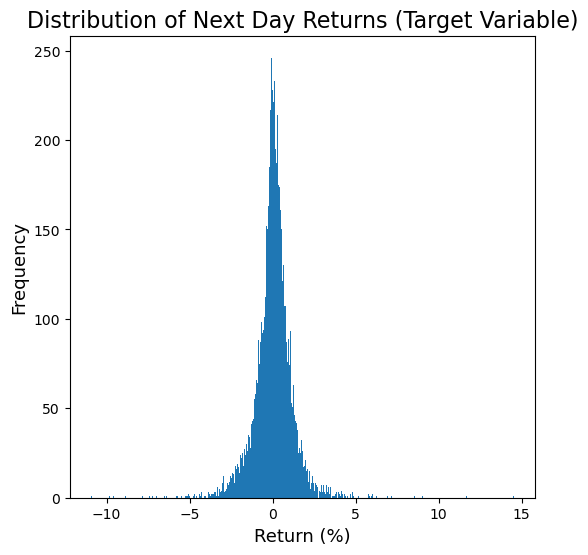

Summary Stats For Next Day Returns:


count    7470.000000
mean        0.035270
std         1.191059
min       -10.942374
25%        -0.458201
50%         0.060485
75%         0.589371
max        14.519772
Name: Future Gain, dtype: float64


In [302]:
plt.figure(figsize=(6,6))  # report use 6 by 6

spy_target_var_df = spy_ohlc_df[["Dates", "Close", "Percent Next Day", "Price Next Day",
                                 "Prev Close Return 1 Day"]].copy()

# Create a histogram of the Percent Next Day:
plt.title("Distribution of Next Day Returns (Target Variable)", fontsize=16)
spy_target_var_df["Future Gain"] = spy_target_var_df["Percent Next Day"] * 100
spy_target_var_df["Future Gain"].plot(kind="hist", bins=500)
plt.xlabel("Return (%)", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.savefig("figures/dist.png")
plt.show()
print("Summary Stats For Next Day Returns:")
print("\n")
print(spy_target_var_df["Future Gain"].describe())

The next day returns of the price seem to be normally distributed with long tails in both directions. This is important information to know when predicting the next day's percentage change, as we know the general distribution the returns are coming from and know that it is centered around 0 with a 1% standard deviation.

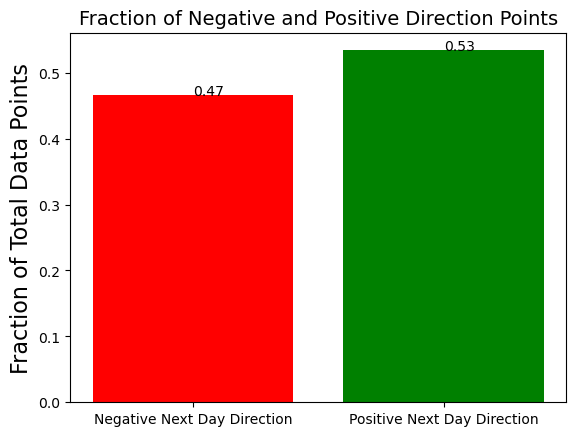

In [303]:
# calculate direction:
directions = []
for i in range(0, len(spy_target_var_df) - 1):
    current_price = spy_target_var_df["Close"].iloc[i]
    next_price = spy_target_var_df["Close"].iloc[i + 1]
    if next_price > current_price:
        directions.append(1)
    else:
        directions.append(0)
directions.append(np.nan)
        
spy_target_var_df["Direction Next Day"] = directions


# Plot balance of Positve and Negative Directions:
direction_df = spy_target_var_df.iloc[0:-1]
num_neg_frac = len(direction_df[direction_df["Direction Next Day"] == 0]) / len(direction_df)
num_pos_frac = len(direction_df[direction_df["Direction Next Day"] == 1]) / len(direction_df)
fracs = [num_neg_frac, num_pos_frac]

fig, ax = plt.subplots()
ax.bar(["Negative Next Day Direction", "Positive Next Day Direction"], fracs, 
       color=["red", "green"])
plt.title("Fraction of Negative and Positive Direction Points", fontsize=14)
plt.ylabel("Fraction of Total Data Points", fontsize=16)
ax.text(0, num_neg_frac, s=str(round(num_neg_frac, 2)))
ax.text(1, num_pos_frac, s=str(round(num_pos_frac, 2)))
plt.savefig("figures/frac_pos.png")
plt.show()

Roughly 50% of the target variable points are positive and 50% are negative. This gives us more information on how hard it may be to predict the magnitude of the next day's price and whether that value is positive or negative.

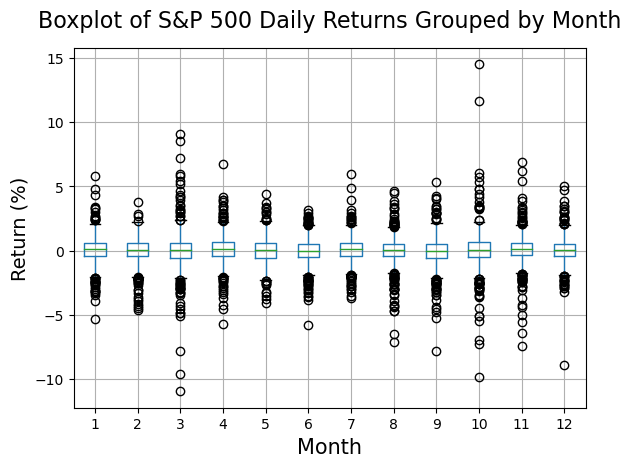

In [305]:
# plot seasonality concerns: the distribution of percent changes by month

date_df = spy_target_var_df.iloc[0:-1].copy()
months = [date.strftime("%B") for date in list(date_df["Dates"])]
date_df["month"] = months

date_df = spy_target_var_df.iloc[0:-1].copy()
date_df['Prev Close Return 1 Day'] = date_df['Prev Close Return 1 Day'] * 100
months = [date.month for date in list(date_df["Dates"])]
date_df["month"] = months
date_df[['Prev Close Return 1 Day', 'month']].boxplot(by='month')
plt.title("")
plt.suptitle("")
plt.suptitle("Boxplot of S&P 500 Daily Returns Grouped by Month", fontsize=16)
plt.ylabel('Return (%)', fontsize=14)
plt.xlabel("Month", fontsize=15)
plt.savefig("figures/month_boxplot.png")
plt.show()

Returns by month vary and some months express heighted variance, thus we add the Month variable to the feature matrix to account for this.

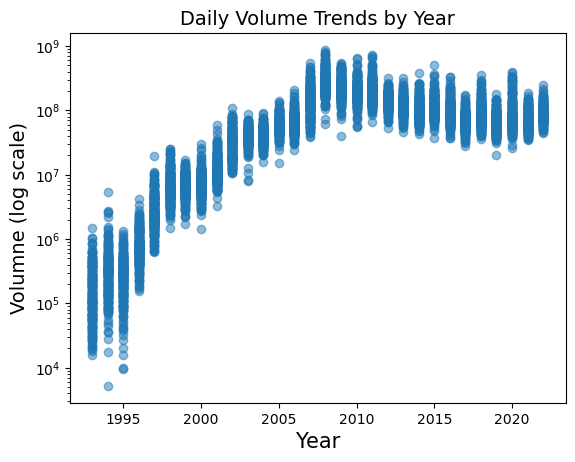

FileNotFoundError: [Errno 2] No such file or directory: 'figures/year_returns.png'

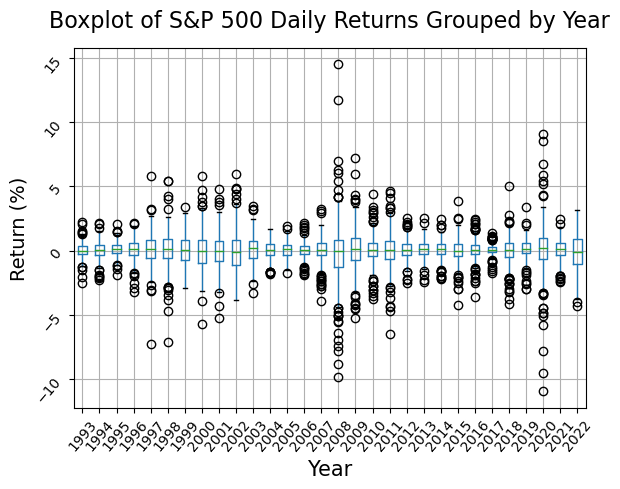

In [8]:
date_df = spy_ohlc_df.iloc[0:-1].copy()
years = [date.year for date in list(date_df["Dates"])]
date_df["year"] = years

# scatter plot volume by day:
plt.scatter(date_df["year"], date_df["Volume"], alpha=0.5)
plt.yscale('log')
plt.ylabel('Volumne (log scale)', fontsize=14)
plt.xlabel("Year", fontsize=15)
plt.title("Daily Volume Trends by Year", fontsize=14)
plt.savefig("vol.png")
plt.show()


date_df['Prev Close Return 1 Day'] = date_df['Prev Close Return 1 Day'] * 100
date_df[['Prev Close Return 1 Day', 'year']].boxplot(by='year')
plt.title("")
plt.suptitle("")
plt.suptitle("Boxplot of S&P 500 Daily Returns Grouped by Year", fontsize=16)
plt.ylabel('Return (%)', fontsize=14)
plt.xlabel("Year", fontsize=15)
plt.tick_params(rotation=50)
plt.savefig("figures/year_returns.png")
plt.show()

Initially, I thought that as volume increase, so would volatility, but volatility looks to be more correlated with the state of the economy, such as major economic events such as the Financial Crisis of 2008 or the Covid-19 Pandemic.

# Data Preprocessing

My data is not iid, as previous prices are directly related and correlated to previous prices.

Since I am working with time-series data, I split my data with a 60-20-20 train-validation-test split with the earliest data in train.

I believe the splitting the data in the tradition time-series manner will be useful, given the forward predictions we are trying to make. It makes sense to see if we can create a model that works well on the price period from 1993 to 2010 and can generalize well to the validation and test data from 2010-2022. Additionally, since we have a major stock market event, namely the 2008 financial crisis in the training data and another major event in the test data, namely the 2020 Covid-19 pandemic, we have volatile events in both periods. 

Splitting the data is important for deployment, as the model will take in today's prices and historical prices to predict tomorrow's price. Since tomorrow is unknown, treating time linearly by training on a period in the past and seeing if it generalizes well to test data that is close to the future is a good plan for the implementation aspects of the model.

In [272]:
# first drop the rows with nan values (row index 0 to 200), then check for other nans:
# we drop the first 200 values because the most data calculations needs to calculate an indicator are 200
# we also drop the last value because there is no "Next Day Price" for the last close value.
spy_ohlc_df = spy_ohlc_df.copy().iloc[200:-2, :]

print("Does the DF contain any nan values?", spy_ohlc_df.isnull().values.any())

Does the DF contain any nan values? False


In [273]:
# Splitting:
def basic_split(X,y,train_size,val_size,test_size,random_state):
    
    # test the inputs
    if train_size + val_size + test_size != 1 or type(random_state) != int:
        if train_size + val_size + test_size != 1 and type(random_state) == int:
            raise ValueError("Train Size + Val Size + Test Size must equal 1.")
        elif train_size + val_size + test_size == 1 and type(random_state) != int:
            raise ValueError("Random State must be an integer.")
        else:  # both tests fail:
            raise ValueError("Train Size + Val Size + Test Size must equal 1 and Random State must be an integer.")
    
    # perform basic split
    X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=train_size, 
                                                          test_size=(val_size+test_size), random_state=random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size=(val_size/(val_size + test_size)), 
                                                    test_size=(test_size/(val_size + test_size)), 
                                                    random_state=random_state)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [276]:
# convert date to a timestamp number:
spy_ohlc_df["Dates"] = [date.timestamp() for date in spy_ohlc_df["Dates"]]

# Month Ordinal Encoding:
enc = OrdinalEncoder()
spy_ohlc_df["Month"] = enc.fit_transform(spy_ohlc_df["Month"].to_numpy().reshape(-1, 1))

# note: the above line is done here because graphs require Date to be DateTime

# 60-20-20 (train-val-test) for Price:
y_price = spy_ohlc_df["Price Next Day"].to_numpy()
X_price = spy_ohlc_df.drop(labels=["Percent Next Day", "Price Next Day"], axis=1)
X_train_price, y_train_price, X_val_price, y_val_price, X_test_price, y_test_price = \
    basic_split(X_price, y_price, 0.6, 0.2, 0.2, 7)
print("X train price Len:", len(X_train_price))
print("Y train price Len:", len(y_train_price))

print("X val price Len:", len(X_val_price))
print("Y val price Len:", len(y_val_price))

print("X test price Len:", len(X_test_price))
print("Y test price Len:", len(y_test_price))

print("\n")

# 60-20-20 (train-val-test) for Percent Change:
y_pct = spy_ohlc_df["Percent Next Day"].to_numpy()
X_pct = spy_ohlc_df.drop(labels=["Percent Next Day", "Price Next Day"], axis=1)
X_train_pct, y_train_pct, X_val_pct, y_val_pct, X_test_pct, y_test_pct = \
    basic_split(X_pct, y_pct, 0.6, 0.2, 0.2, 7)
print("X train pct Len:", len(X_train_pct))
print("Y train pct Len:", len(y_train_pct))

print("X val pct Len:", len(X_val_pct))
print("Y val pct Len:", len(y_val_pct))

print("X test pct Len:", len(X_test_pct))
print("Y test pct Len:", len(y_test_pct))

X train price Len: 4361
Y train price Len: 4361
X val price Len: 1454
Y val price Len: 1454
X test price Len: 1454
Y test price Len: 1454


X train pct Len: 4361
Y train pct Len: 4361
X val pct Len: 1454
Y val pct Len: 1454
X test pct Len: 1454
Y test pct Len: 1454


Now, I will apply a StandardScaler to all continuous columns as well as a separate DataFrame that uses MinMaxScaler and I will compare both in my modeling process. It makes sense to normalize variables related to percent change with a StandardScaler due to the mean and standard deviation normalization. In order to creata a more stable approximation of the next day's price, a MinMaxScaler may be appropriate, so testing both depending on the target variable (next day's price or next day's percent change) is needed.

I apply an OrdinalEncoder to the Month variable to convert it to a value (1 to 12).

For now, I drop the Date variable, which is of type 'DateTime', but will experiment with including it instead of the month variable as a timestamp number.

In [277]:
# Apply Scalers:

# StandardScaler on data with target variable of 'Price':
standard_scaler_X = StandardScaler()
standard_scaler_X.fit(X_train_price)

X_train_price = standard_scaler_X.transform(X_train_price)
X_val_price = standard_scaler_X.transform(X_val_price)
X_test_price = standard_scaler_X.transform(X_test_price)

# reshape y:
y_train_price = y_train_price.reshape(-1, 1)
y_val_price = y_val_price.reshape(-1, 1)
y_test_price = y_test_price.reshape(-1, 1)

standard_scaler_y = StandardScaler()
standard_scaler_y.fit(y_train_price)

y_train_price = standard_scaler_y.transform(y_train_price)
y_val_price = standard_scaler_y.transform(y_val_price)
y_test_price = standard_scaler_y.transform(y_test_price)


# MinMaxScaler on data with target variable of 'Percent Change':
min_max_scaler_X = MinMaxScaler()
min_max_scaler_X.fit(X_train_pct)

X_train_pct = min_max_scaler_X.transform(X_train_pct)
X_val_pct = min_max_scaler_X.transform(X_val_pct)
X_test_pct = min_max_scaler_X.transform(X_test_pct)

# reshape y:
y_train_pct = y_train_pct.reshape(-1, 1)
y_val_pct = y_val_pct.reshape(-1, 1)
y_test_pct = y_test_pct.reshape(-1, 1)

min_max_scaler_y = MinMaxScaler()
min_max_scaler_y .fit(y_train_pct)

y_train_pct = min_max_scaler_y.transform(y_train_pct)
y_val_pct = min_max_scaler_y.transform(y_val_pct)
y_test_pct = min_max_scaler_y.transform(y_test_pct)

print("Success")

Success


In [279]:
# print columns and rows after Preprocessing:
print("\n")
print("After Preprocessing, there are " + str(spy_ohlc_df.shape[0]) + " Rows and " + str(spy_ohlc_df.shape[1]) 
      + " Cols for SPY")
print("\n")



After Preprocessing, there are 7269 Rows and 38 Cols for SPY




# References
<font size=4><a name="cite_note-4"></a>a.[^](#cite_ref-4)
Kamaloc, Firuz, Smail, Linda, Gurrib, Ikhlaas (2021). FORECASTING WITH DEEP LEARNING: S&P 500 INDEX </font>

<font size=4><a name="cite_note-5"></a>b.[^](#cite_ref-5)
Fuster, Alex, Zou, Zhichao (2018). Using Machine Learning Models to Predict S&P500 Price
Level and Spread Direction </font>